# Testing new AMM


In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('../..')

# Experiments
from model import run
from model import processing
from model.amm.omnipool_amm import OmnipoolState
from model.amm.agents import agent_dict, TradeStrategies

from model import plot_utils as pu
from model import init_utils

# same seed, same parameters = same simulation result
random.seed(42)

initial_state = OmnipoolState(
    tokens={
        'HDX': {'liquidity': 1000000, 'LRNA_price': 1},
        'USD': {'liquidity': 1000000, 'LRNA_price': 1},
        'R1': {'liquidity': 1000000, 'LRNA_price': 2},
        'R2': {'liquidity': 30000000, 'LRNA_price': 2/3},
    },
    lrna_fee=0,
    asset_fee=0
)

agent_d = {
    'Trader': agent_dict(
        r_values = {'R1': 1000000, 'R2': 1000000},
        trade_strategy=TradeStrategies.random_swaps(amount={'R1': 333, 'R2': 1000}, randomize_amount=True)
    ), 
    'LP1': agent_dict(
        s_values = {'R1': 500000},
        p_values = {'R1': 2}
    ), 
    'LP2': agent_dict(
        s_values = {'R2': 1500000},
        p_values = {'R2': 2/3}
    )
}

state = {'state': {'amm': initial_state, 'agents': agent_d, 'external': {}}}
config_dict = init_utils.get_configuration(timesteps = 1000)

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.2f}'.format

run.config(config_dict, state)
events = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 1, 1, 1)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.59s


In [2]:
rdf, agent_df = processing.postprocessing(events, optional_params=['deposit_val', 'withdraw_val', 'pool_val'])


In [3]:
%matplotlib inline



In [4]:
rdf.head(20)

,P-HDX,Q-HDX,R-HDX,S-HDX,T-HDX,P-USD,Q-USD,R-USD,S-USD,T-USD,...,R-R2,S-R2,T-R2,L,pool_val,simulation,subset,run,substep,timestep
1,1.00,1000000.00,1000000.00,1000000.00,1000000.00,1.00,1000000.00,1000000.00,1000000.00,1000000.00,...,30000000.00,30000000.00,20000000.00,0.00,48000000.0,0,0,1,1,1
2,1.00,1000000.00,1000000.00,1000000.00,1000000.00,1.00,1000000.00,1000000.00,1000000.00,1000000.00,...,30000000.00,30000000.00,20000000.00,0.00,48000000.0,0,0,1,1,2
3,1.00,1000000.00,1000000.00,1000000.00,1000000.00,1.00,1000000.00,1000000.00,1000000.00,1000000.00,...,30000000.00,30000000.00,20000000.00,0.00,48000000.0,0,0,1,1,3
4,1.00,1000000.00,1000000.00,1000000.00,1000000.00,1.00,1000000.00,1000000.00,1000000.00,1000000.00,...,30000000.00,30000000.00,20000000.00,0.00,48000000.0,0,0,1,1,4
5,1.00,1000000.00,1000000.00,1000000.00,1000000.00,1.00,1000000.00,1000000.00,1000000.00,1000000.00,...,30000000.00,30000000.00,20000000.00,0.00,48000000.0,0,0,1,1,5
6,1.00,1000000.00,1000000.00,1000000.00,1000000.00,1.00,1000000.00,1000000.00,1000000.00,1000000.00,...,29999551.31,30000000.00,20000000.00,0.00,48000000.0,0,0,1,1,6
7,1.00,1000000.00,1000000.00,1000000.00,1000000.00,1.00,1000000.00,1000000.00,1000000.00,1000000.00,...,29998793.73,30000000.00,20000000.00,0.00,48000000.0,0,0,1,1,7
8,1.00,1000000.00,1000000.00,1000000.00,1000000.00,1.00,1000000.00,1000000.00,1000000.00,1000000.00,...,29999133.98,30000000.00,20000000.00,0.00,48000000.0,0,0,1,1,8
9,1.00,1000000.00,1000000.00,1000000.00,1000000.00,1.00,1000000.00,1000000.00,1000000.00,1000000.00,...,29999133.98,30000000.00,20000000.00,0.00,48000000.0,0,0,1,1,9
10,1.00,1000000.00,1000000.00,1000000.00,1000000.00,1.00,1000000.00,1000000.00,1000000.00,1000000.00,...,29999041.38,30000000.00,20000000.00,0.00,48000000.0,0,0,1,1,10


In [5]:
agent_df.tail(20)

,simulation,subset,run,substep,timestep,agent_id,withdraw_val,deposit_val,p-R2,p-R1,q,r-R2,r-R1,s-R2,s-R1,trade_strategy
2983,0,0,1,1,994,LP1,1006140.62570079,1006145.34632776,0.00,2,0,0,0,0,500000,None
2984,0,0,1,1,994,LP2,999386.453685895,999386.500733561,0.67,0,0,0,0,1500000,0,None
2985,0,0,1,1,995,Trader,2678569.06713792,2678548.35981122,0.00,0,0,990793.274547257,1003058.58332071,0,0,<model.amm.agents.TradeStrategy object at 0x00...
2986,0,0,1,1,995,LP1,1006140.62570079,1006145.34632776,0.00,2,0,0,0,0,500000,None
2987,0,0,1,1,995,LP2,999386.453685895,999386.500733561,0.67,0,0,0,0,1500000,0,None
2988,0,0,1,1,996,Trader,2678595.1023853,2678574.304671,0.00,0,0,990773.196548926,1003065.23097964,0,0,<model.amm.agents.TradeStrategy object at 0x00...
2989,0,0,1,1,996,LP1,1006154.02326036,1006158.76452441,0.00,2,0,0,0,0,500000,None
2990,0,0,1,1,996,LP2,999385.116180278,999385.163433275,0.67,0,0,0,0,1500000,0,None
2991,0,0,1,1,997,Trader,2678498.33543067,2678477.87267878,0.00,0,0,990847.823125326,1003040.52224585,0,0,<model.amm.agents.TradeStrategy object at 0x00...
2992,0,0,1,1,997,LP1,1006104.2268957,1006108.89168296,0.00,2,0,0,0,0,500000,None


## Analysis

[0]


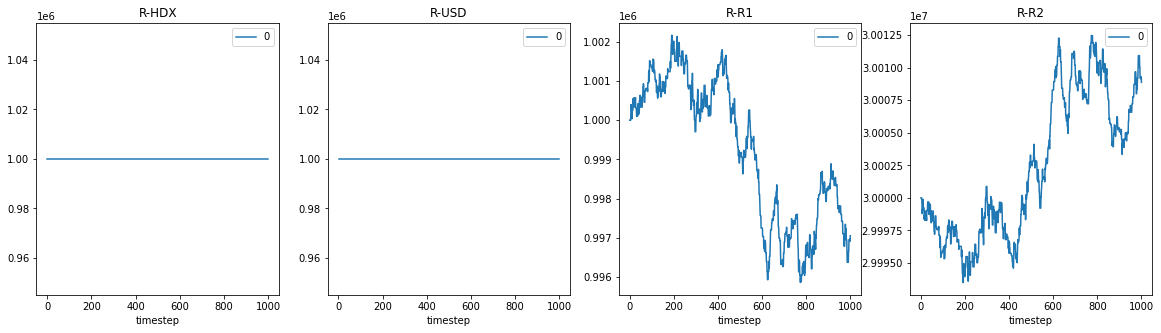

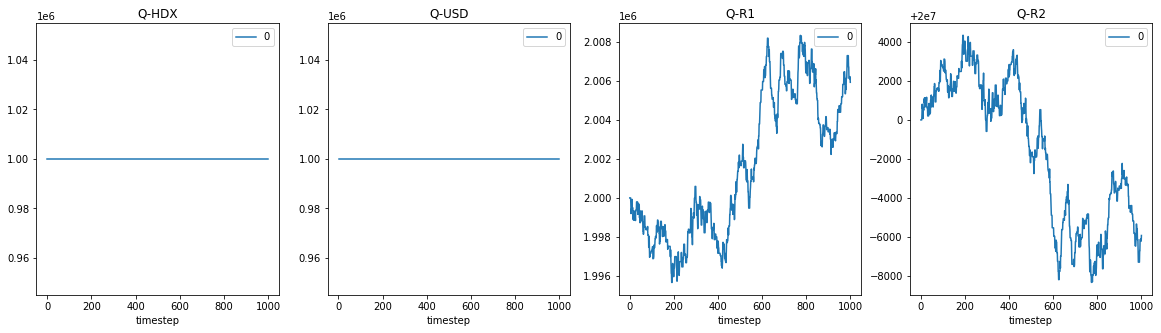

In [6]:
var_list = ['R', 'Q']
pu.plot_vars(rdf, var_list)


[0]


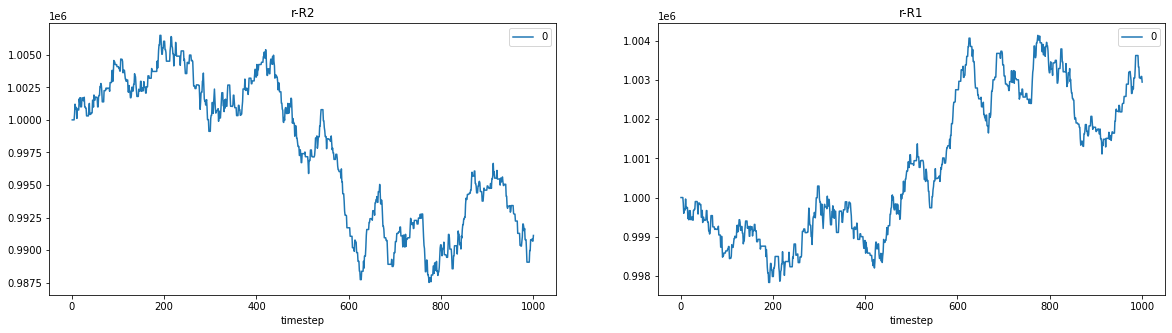

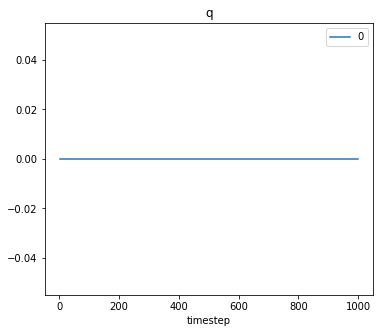

In [7]:
var_list = ['r', 'q']
trader_df = agent_df[agent_df['agent_id'] == 'Trader']
pu.plot_vars(trader_df, var_list)


In [8]:
# merge agent_df, rdf to one df on timesteps, run, etc

merged_df = pd.merge(agent_df, rdf, how="inner", on=["timestep", "simulation", "run", "subset", "substep"])

In [9]:
# add IL column to agent DF, where val_hold is calculated using initial holdings from agent_d
merged_df['IL'] = merged_df.apply(lambda x: x['withdraw_val']/x['deposit_val'] - 1, axis=1)
merged_df['pool_loss'] = merged_df.apply(lambda x: x['pool_val']/2000000 - 1, axis=1)

merged_df[['timestep', 'agent_id', 'q','Q-R1', 's-R1','S-R1','r-R1','R-R1','pool_val', 'deposit_val','IL','withdraw_val', 'p-R1']].tail()

,timestep,agent_id,q,Q-R1,s-R1,S-R1,r-R1,R-R1,pool_val,deposit_val,IL,withdraw_val,p-R1
2995,999,LP1,0,2006206.79,500000,1000000.00,0,996906.20,48000000.0,1006216.42517369,-4.80061529251063e-6,1006211.59471573,2
2996,999,LP2,0,2006206.79,0,1000000.00,0,996906.20,48000000.0,999379.41690069,-4.81703130716937e-8,999379.368760271,0
2997,1000,Trader,0,2005917.79,0,1000000.00,1002950.16510327,997049.83,48000000.0,2678125.29322128,7.19201692733762e-6,2678144.55434372,0
2998,1000,LP1,0,2005917.79,500000,1000000.00,0,997049.83,48000000.0,1005926.54371579,-4.36459434816072e-6,1005922.15325448,2
2999,1000,LP2,0,2005917.79,0,1000000.00,0,997049.83,48000000.0,999408.308684544,-4.37882330395212e-8,999408.26492222,0


In [10]:
merged_df[['timestep', 'agent_id', 'q','Q-R1','s-R1','S-R1','r-R1','R-R1','withdraw_val', 'deposit_val','IL','pool_val']].head()


,timestep,agent_id,q,Q-R1,s-R1,S-R1,r-R1,R-R1,withdraw_val,deposit_val,IL,pool_val
0,1,Trader,0,2000000.00,0,1000000.00,1000000,1000000.00,2666666.66666667,2666666.66666667,0.0,48000000.0
1,1,LP1,0,2000000.00,500000,1000000.00,0,1000000.00,1000000.0,1000000.0,0.0,48000000.0
2,1,LP2,0,2000000.00,0,1000000.00,0,1000000.00,1000000.0,1000000.0,0.0,48000000.0
3,2,Trader,0,2000000.00,0,1000000.00,1000000,1000000.00,2666666.66666667,2666666.66666667,0.0,48000000.0
4,2,LP1,0,2000000.00,500000,1000000.00,0,1000000.00,1000000.0,1000000.0,0.0,48000000.0


## Conclusion



[0]


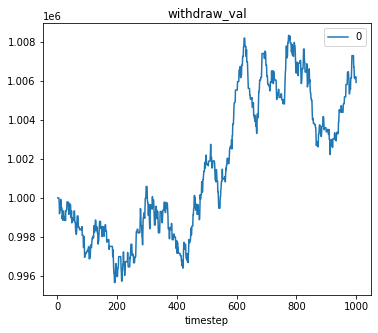

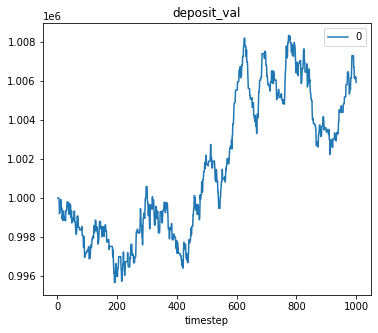

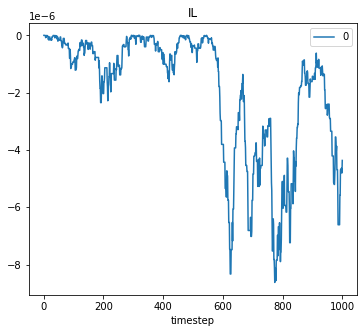

In [12]:
var_list = ['withdraw_val', 'deposit_val', 'IL']
LP1_merged_df = merged_df[merged_df['agent_id'] == 'LP1']
pu.plot_vars(LP1_merged_df, var_list)